# Logistic Regression Practices LAB

We will be using the Human Activity Recognition with Smartphones database, which was built from the recordings of study participants who carried a smartphone with an embedded inertial sensor while performing activities of daily living (ADL). The objective is to classify the activities the participants performed into one of the six following categories: walking, walking upstairs, walking downstairs, sitting, standing, and laying.

The following information is provided for each record in the dataset:

1. Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration
2. Triaxial Angular velocity from the gyroscope
3. A 561-feature vector with time and frequency domain variables
4. The activity label


More information about the features are available on the website linked above.

## Import all important library

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### Load dataset 

Import the data and do the following:

1. Examine the data types--there are many columns, so it might be wise to use value counts.
2. Determine if the floating point values need to be scaled.
3. Determine the breakdown of each activity.
4. Encode the activity label as an integer.

In [2]:
### BEGIN SOLUTION
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv", sep=',')

In [3]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [4]:
data.dtypes.tail()


angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

In [5]:
data.dtypes.head()

tBodyAcc-mean()-X    float64
tBodyAcc-mean()-Y    float64
tBodyAcc-mean()-Z    float64
tBodyAcc-std()-X     float64
tBodyAcc-std()-Y     float64
dtype: object

In [6]:
data.iloc[:, :-1].min().value_counts()

-1.0    561
dtype: int64

In [7]:
data.iloc[:, :-1].max().value_counts()

1.0    561
dtype: int64

In [8]:
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)
### END SOLUTION

3735    3
4787    0
8636    3
3330    0
60      0
Name: Activity, dtype: int32

1. Calculate the correlations between the dependent variables.
2. Create a histogram of the correlation values.
3. Identify those that are most correlated (either positively or negatively).

In [10]:
## BEGIN SOLUTION
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

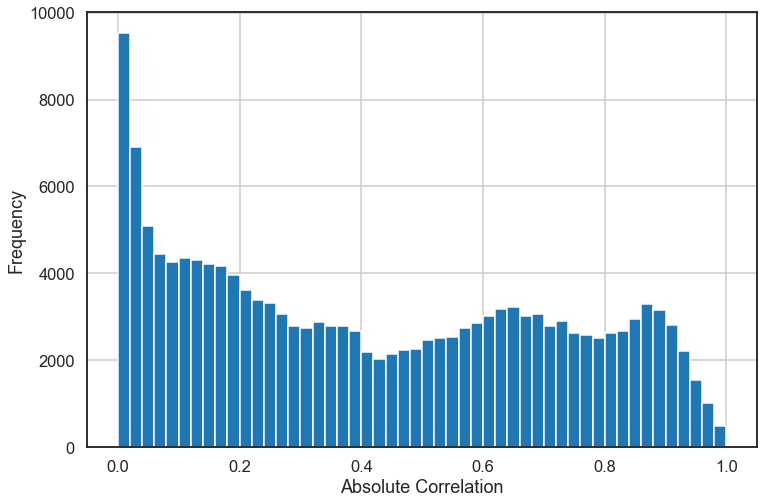

In [12]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [13]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')
### END SOLUTION

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


1. Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's StratifiedShuffleSplit to maintain the same ratio of predictor classes.
2.Regardless of the method used to split the data, compare the ratio of classes in both the train and test splits.

In [14]:
### BEGIN SOLUTION
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [15]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [16]:
y_test.value_counts(normalize=True)
### END SOLUTION

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

1. Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.


2. Using cross validation to determine the hyperparameters and fit models using L1 and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

In [17]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [18]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [19]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
### END SOLUTION

Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately.

In [20]:
## BEGIN SOLUTION
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                                                          l1  \
            0         1         2         3         4         5         0   
338  0.014661 -0.074391  0.126724  0.060642 -0.141092  0.060390 -0.005705   
551 -0.116464 -0.113011  0.255294 -0.184085  0.290344 -0.217004 -0.048024   
265 -0.014700 -0.538298 -0.302710 -0.397239  0.143500  0.480830  0.000000   
453  0.233892  0.030986 -0.411785 -0.116153 -0.145553 -0.155962  1.400247   
210 -0.011338  0.065728 -0.023260 -0.003970  0.293033  0.036449  0.000000   
492  0.002908  0.244178  0.268717  0.013330  0.082936  0.503164 -0.024420   
257 -0.030255 -0.188538  0.091225  0.246750 -0.055826 -0.298604 -0.035014   
144  0.048247  0.192625 -0.252875  0.330676  0.033527  0.151371  0.000000   
286 -0.032157  0.136030 -0.221647 -0.137581  0.663114 -0.395061 -0.357698   
282 -0.036071  0.031882 -0.175761 -0.136016 -0.164763 -0.088916  0.000000   

                                                        l2            \
            1         2    3         4         5         0         1   
338  0.000000  0.000000  0.0  0.000000  0.040687  0.023066 -0.103786   
551 -0.098440  0.727715  0.0  2.233192 -0.296235 -0.175638 -0.758273   
265 -0.522219  0.000000  0.0  0.000000  1.628902 -0.017315 -1.650476   
453  0.000000 -0.394794  0.0 -0.140157 -0.402881  0.457465  0.188114   
210  0.000000  0.000000  0.0  0.000000  0.446376 -0.039560  0.647758   
492  0.476665  0.501388  0.0  0.094514  0.433000 -0.016691  0.586291   
257  0.000000  0.000000  0.0  0.000000  0.037008 -0.056422 -1.218960   
144  0.000000  0.028000  0.0  0.000000  0.141093  0.130266  0.269207   
286  0.000000  0.000000  0.0  1.195505 -0.601563 -0.056938  1.559395   
282  0.000000  0.000000  0.0  0.000000 -0.566292 -0.059133  0.431064   

                                             
            2         3         4         5  
338  0.155194  0.204431 -0.205875 -0.028189  
551  0.497612 -0.950473  0.976242 -0.426046  
265 -0.365826 -1.070190  0.084978  1.168995  
453 -0.444066 -0.510466 -0.478655 -0.109631  
210 -0.063847  0.168001  0.435674 -0.005970  
492  0.341070 -0.035060  0.176220  1.072806  
257  0.200176  0.634151 -0.072271 -0.677846  
144 -0.155425  0.476840  0.302781  0.273609  
286 -0.377618 -0.330417  1.111981 -1.017349  
282 -0.221879 -0.177747 -0.184207 -0.214059

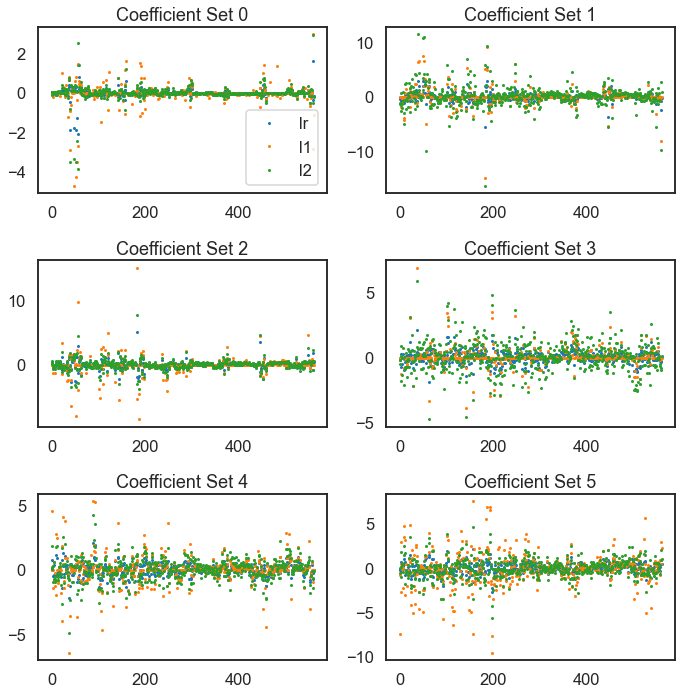

In [21]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()
### END SOLUTION

1. Predict and store the class for each model.
2. Store the probability for the predicted class for each model.

In [22]:
### BEGIN SOLUTION
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


In [23]:
y_prob.head()
### END SOLUTION

,lr,l1,l2
0,0.998939,0.998984,0.999757
1,0.988125,0.999483,0.999477
2,0.987576,0.995345,0.999670
3,0.981381,0.999200,0.994337
4,0.998277,0.999927,0.999997


For each model, calculate the following error metrics:

1. Accuracy
2. Precision
3. Recall
4. F-score
5. Confusion Matrix
Decide how to combine the multi-class metrics into a single value for each model.

In [24]:
### BEGIN SOLUTION
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)
                              


In [25]:
metrics
### END SOLUTION

,lr,l1,l2
precision,0.984144,0.983514,0.983824
recall,0.984142,0.983495,0.983819
fscore,0.984143,0.983492,0.983819
accuracy,0.984142,0.983495,0.983819
auc,0.990384,0.989949,0.990165


Display or plot the confusion matrix for each model.

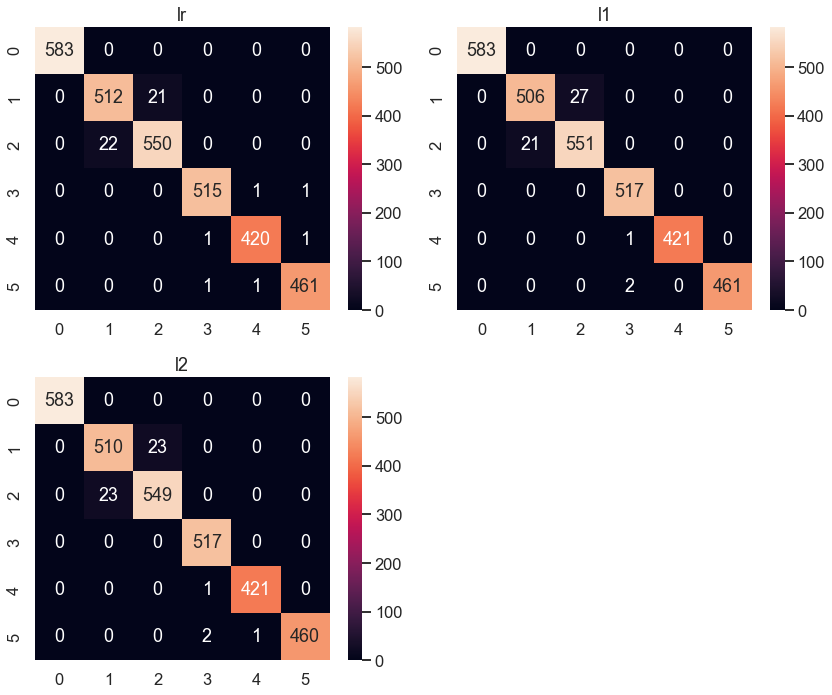

In [26]:
### BEGIN SOLUTION
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()
### END SOLUTION